Example 2: K-fold Cross Validation
In this page we will look at the process of K-fold cross validation

In [1]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_recall_fscore_support

In [2]:
# define function for creating & plotting synthetic data set
def generate_2class_data(class1Mean, class1Cov, class2Mean, class2Cov):
    
    np.random.seed(1)
    class1x = np.random.multivariate_normal(class1Mean, class1Cov, 100)
    class1y = np.zeros(100)
    class2x = np.random.multivariate_normal(class2Mean, class2Cov, 100)
    class2y = np.ones(100)
    
    X = np.concatenate((class1x, class2x), axis=0)
    y = np.concatenate((class1y, class2y))
        
    return X,y

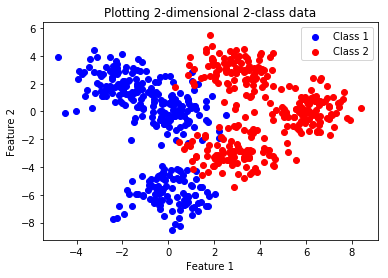

In [3]:
# create a synthetic data set
class1G1Mean = [0, 0]
class1G2Mean = [-2, 2]
class1G3Mean = [ 0, -6]
class1G1Cov = [[1, 0], [0,1]]
class1G2Cov = [[1, 0], [0,1]]
class1G3Cov = [[1, 0], [0,1]]

class2G1Mean = [3, 3]
class2G2Mean = [6, 0]
class2G3Mean = [3, -3]
class2G1Cov = [[1, 0], [0,1]]
class2G2Cov = [[1, 0], [0,1]]
class2G3Cov = [[1, 0], [0,1]]

np.random.seed(1)
class1G1x = np.random.multivariate_normal(class1G1Mean, class1G1Cov, 100)
class1G2x = np.random.multivariate_normal(class1G2Mean, class1G2Cov, 100)
class1G3x = np.random.multivariate_normal(class1G3Mean, class1G3Cov, 100)
class1y = np.zeros(300)
class2G1x = np.random.multivariate_normal(class2G1Mean, class2G1Cov, 100)
class2G2x = np.random.multivariate_normal(class2G2Mean, class2G2Cov, 100)
class2G3x = np.random.multivariate_normal(class2G3Mean, class2G3Cov, 100)
class2y = np.ones(300)

class1x = np.concatenate((class1G1x, class1G2x, class1G3x), axis = 0)
class2x = np.concatenate((class2G1x, class2G2x, class2G3x), axis = 0)

X = np.concatenate((class1x, class2x), axis=0)
y = np.concatenate((class1y, class2y))

# Plotting the 2-class data

plt.title('Plotting 2-dimensional 2-class data')
plt.scatter(class1x[:,0], class1x[:,1], color = 'b', label = 'Class 1')
plt.scatter(class2x[:,0], class2x[:,1], color = 'r', label = 'Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [4]:
# problem 1 - evaluation of classifier performance

# approach 1 - holdout set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify = y, random_state = 15)
clf = SVC(kernel = 'poly', degree=3, C = 0.001, gamma='scale')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
precision_recall_fscore_support(y_test, predictions, average='macro')

(0.8991935483870968, 0.8737373737373737, 0.8716918530806916, None)

In [5]:
# approach 2 - cross validation
clf = SVC(kernel = 'poly', degree=3, C = 0.001, gamma='scale')
scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
scores

array([0.88172346, 0.88172346, 0.88172346, 0.9833287 , 0.9833287 ,
       1.        , 0.91608392, 0.77266103, 0.77266103, 0.64803952])

In [6]:
np.mean(scores)

0.8721273277369168

In [7]:
# problem 2 - hyperparameter tuning

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y, random_state = 15)

#coarse-grained search
result = {}
potential_values = [ 0.0001, 0.001, 0.01, 0.1, 1, 2, 3, 5, 7, 10, 15, 20, 30, 50, 75, 100, 500, 1000, 2000, 5000, 10000]
for C_val in potential_values:
    clf = SVC(kernel = 'poly', degree=3, C = C_val, gamma='scale')
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_macro')
    result[ C_val ] = np.mean(scores)
result

{0.0001: 0.7485763510828025,
 0.001: 0.8708490285418116,
 0.01: 0.9330567327516684,
 0.1: 0.9710904417219293,
 1: 0.9689237353426883,
 2: 0.9689237353426883,
 3: 0.9689237353426883,
 5: 0.9689237353426883,
 7: 0.9689237353426883,
 10: 0.9689237353426883,
 15: 0.9689237353426883,
 20: 0.9689237353426883,
 30: 0.9689237353426883,
 50: 0.9689237353426883,
 75: 0.9689237353426883,
 100: 0.9689237353426883,
 500: 0.9689237353426883,
 1000: 0.9689237353426883,
 2000: 0.9689237353426883,
 5000: 0.9689237353426883,
 10000: 0.9689237353426883}

In [145]:
# fine-grained search
result = {}
potential_values = [ 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15 ]
for C_val in potential_values:
    clf = SVC(kernel = 'poly', degree=3, C = C_val, gamma='scale')
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_macro')
    result[ C_val ] = np.mean(scores)
result

{0.05: 0.97098530200211886,
 0.06: 0.97325920381090436,
 0.07: 0.97109044172192927,
 0.08: 0.97109044172192927,
 0.09: 0.97109044172192927,
 0.1: 0.97109044172192927,
 0.11: 0.97109044172192927,
 0.12: 0.97109044172192927,
 0.13: 0.97109044172192927,
 0.14: 0.96891961224305201,
 0.15: 0.96891961224305201}

In [146]:
# now train on entire training data
clf = SVC(kernel = 'poly', degree=3, C = 0.06, gamma='scale')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
precision_recall_fscore_support(y_test, predictions, average='macro')

(0.93612453032742882, 0.93333333333333335, 0.93322649572649574, None)